# Decision Trees Rectilinear Boundaries, Strengths and Limitation
In this notebook, you will run a code that allows you to visualise both decision trees and their decision boundaries for a set of simple but useful datasets.

**Learning Outcomes:**
1. Ability to recognise the correspondence between decision trees structure and their decision boundaries
2. Ability to recognise how overfitting manifests itself on the DT decision boundaries
3. Ability to recognise the trend of divergence between training and testing when overfitting occurs


In [1]:
%matplotlib inline
from IPython.display import display, HTML
display(HTML('<style>.container {width: 85% !important}</style>'))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from itertools import product
from helpers import plotClassBoundary # this is our own funciton that you need to download as per the previous activity

## Decision Regions

The following function plots a tree. Be mindful not to rename plot_tree since this is the function ‎name that is used by sklearn.

In [3]:
def plotTree(clf, ax, fontsize=None):
    # This function is responsible for plotting the decision tree structure in the specified axes.
    # 'clf' is the decision tree classifier object from which the tree is plotted.
    # 'ax' is the matplotlib axes object where the tree will be drawn.
    # 'fontsize' is an optional parameter to specify the font size of the text in the plot.

    plt.sca(ax)  # Sets the specified 'ax' as the current matplotlib axes so that the tree is plotted in the right subplot.

    # The plot_tree function from sklearn is called to visualize the tree.
    # 'label='none'' ensures that no labels are printed on the nodes for clarity.
    # 'filled=True' colors the nodes based on the class.
    # 'rounded=True' makes the corners of the nodes rounded for better aesthetics.
    # 'impurity=False' avoids displaying the impurity value at each node to keep the visualization clean.
    # 'feature_names' and 'class_names' provide custom names for features and classes respectively to enhance readability.
    plot_tree(clf, label='none', fontsize=fontsize,
              filled=True, rounded=True, impurity=False,
              feature_names=['$x_1$', '$x_2$'], class_names=['C1', 'C2'])

    # Set the title of the axes to include the maximum depth of the tree.
    # This provides insight into the complexity of the tree directly in its visualization.
    ax.set_title('Decision Tree (depth=' + str(clf.tree_.max_depth) + ')')

Now we try all possible Classification Problems in our list of datasets

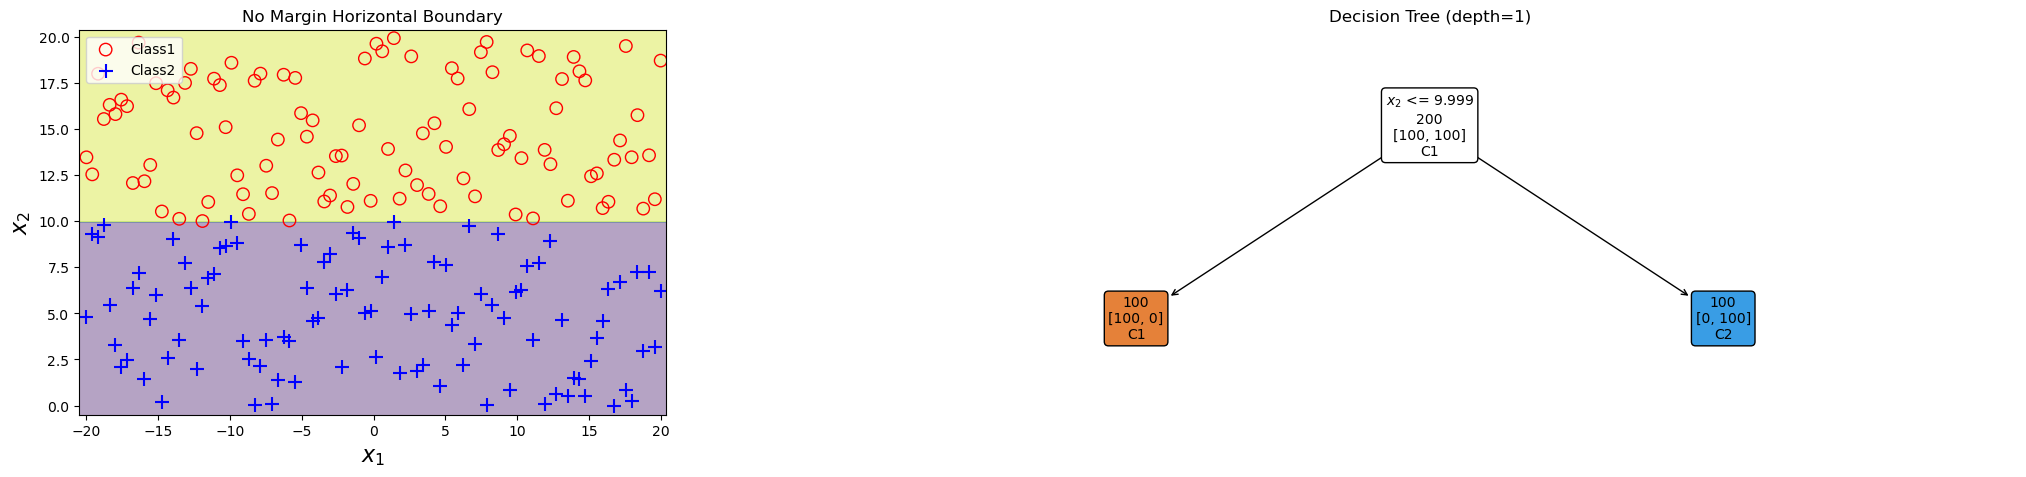

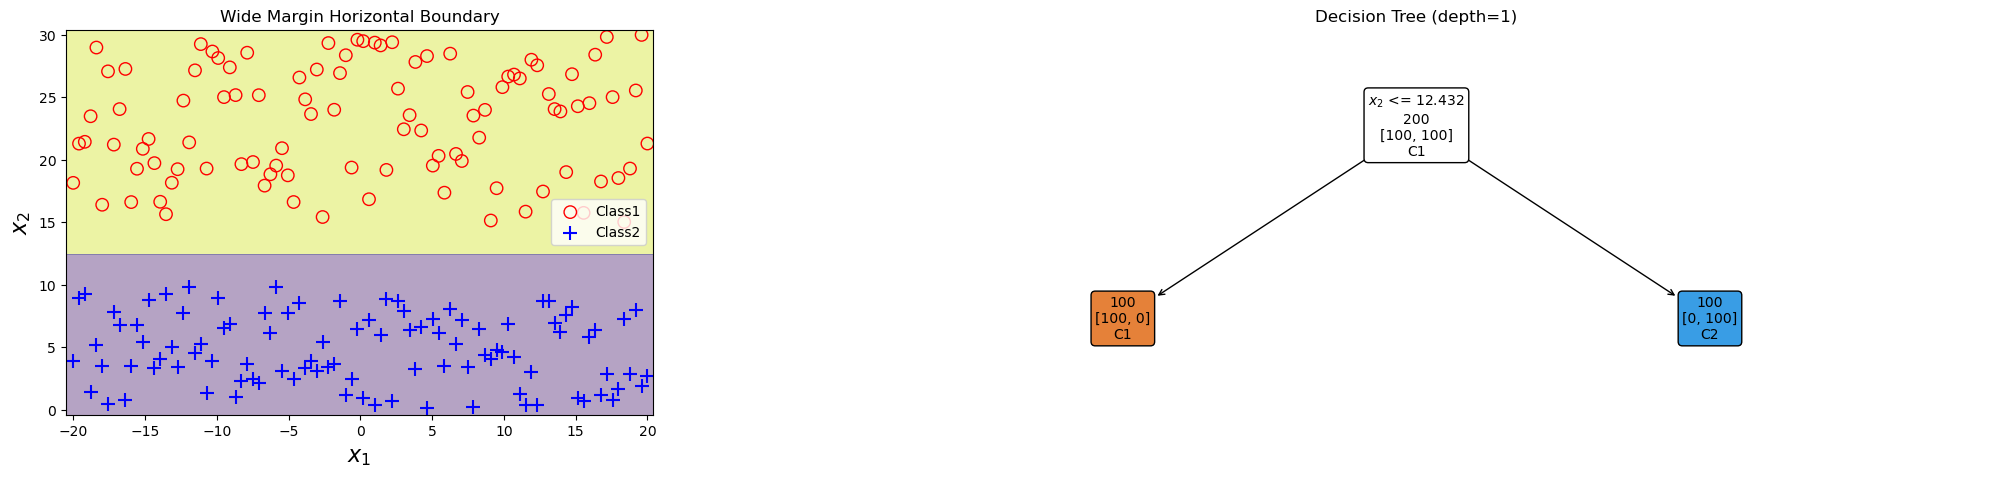

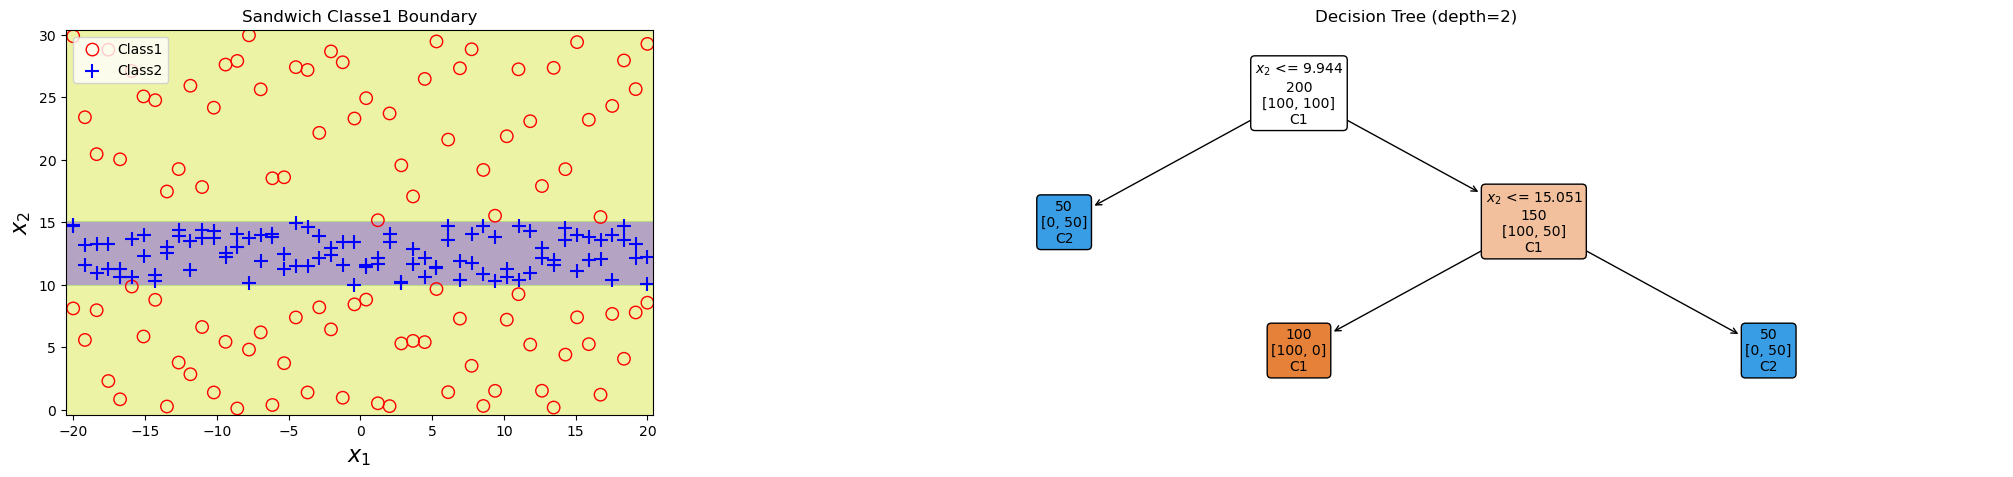

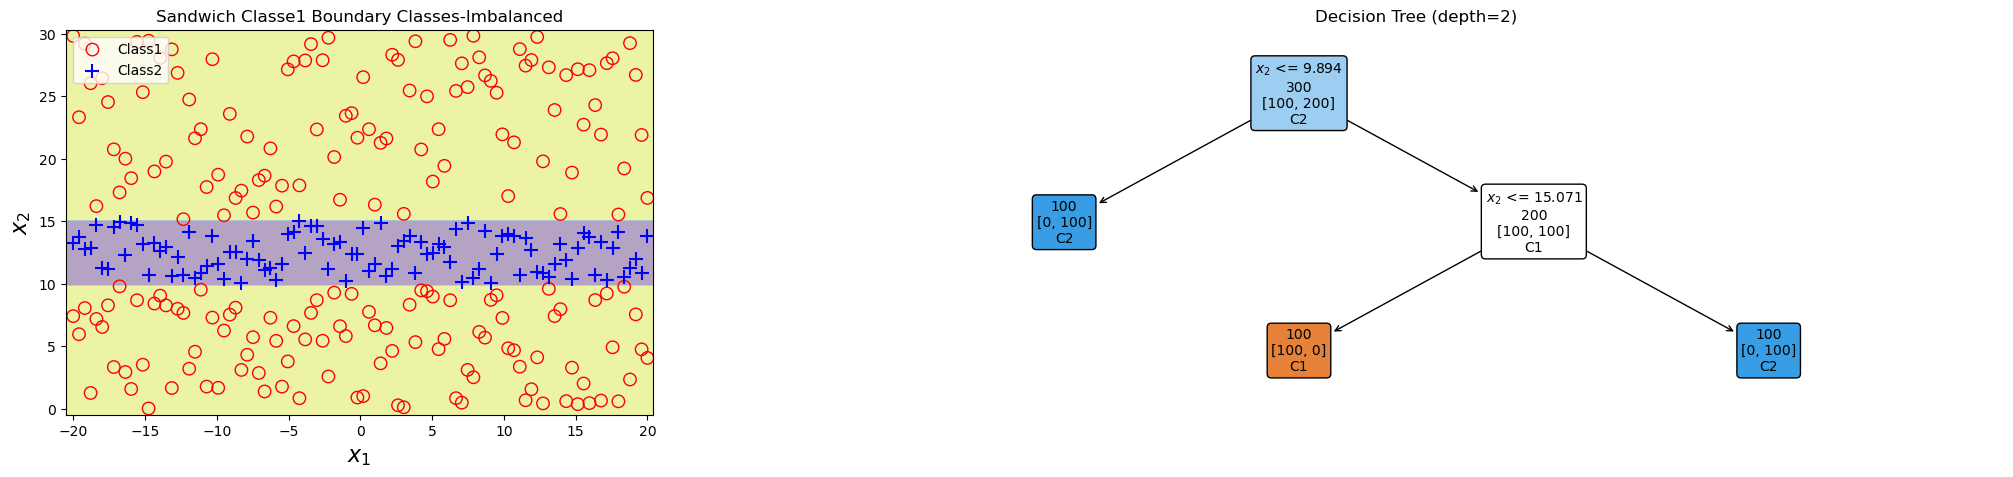

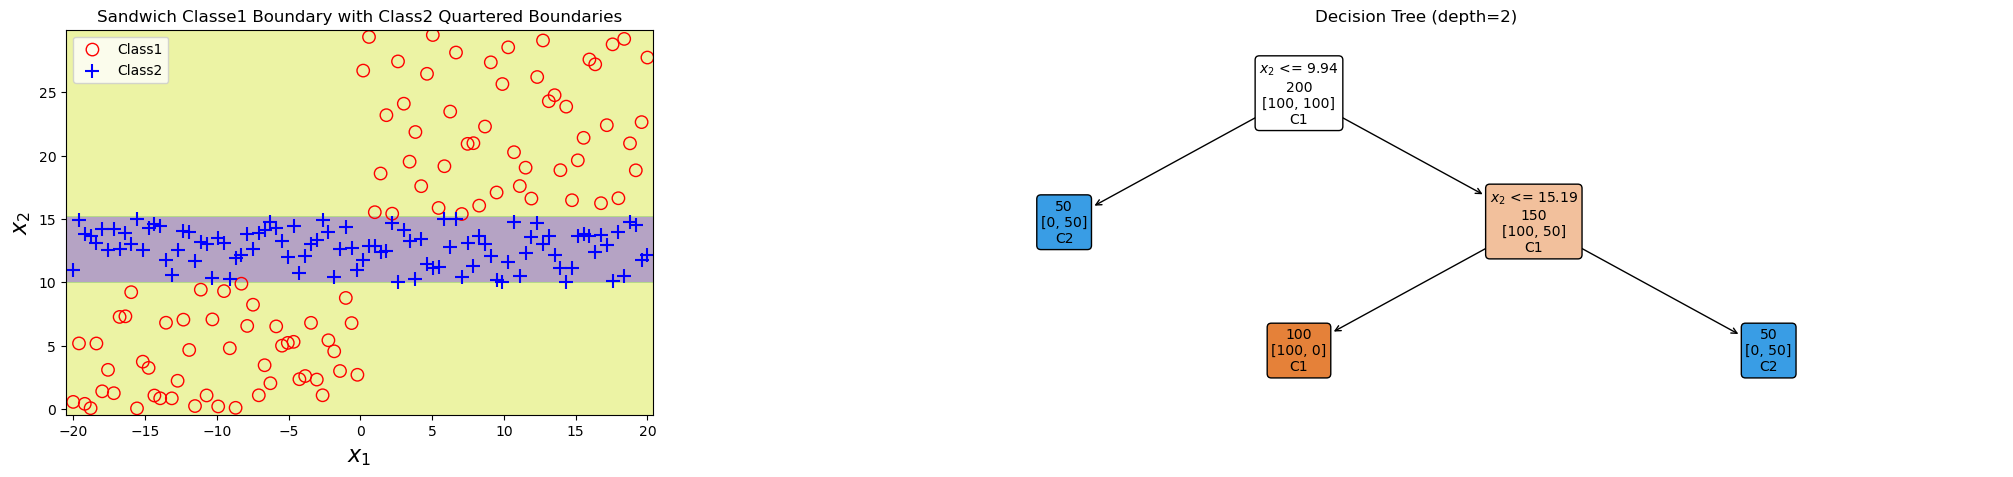

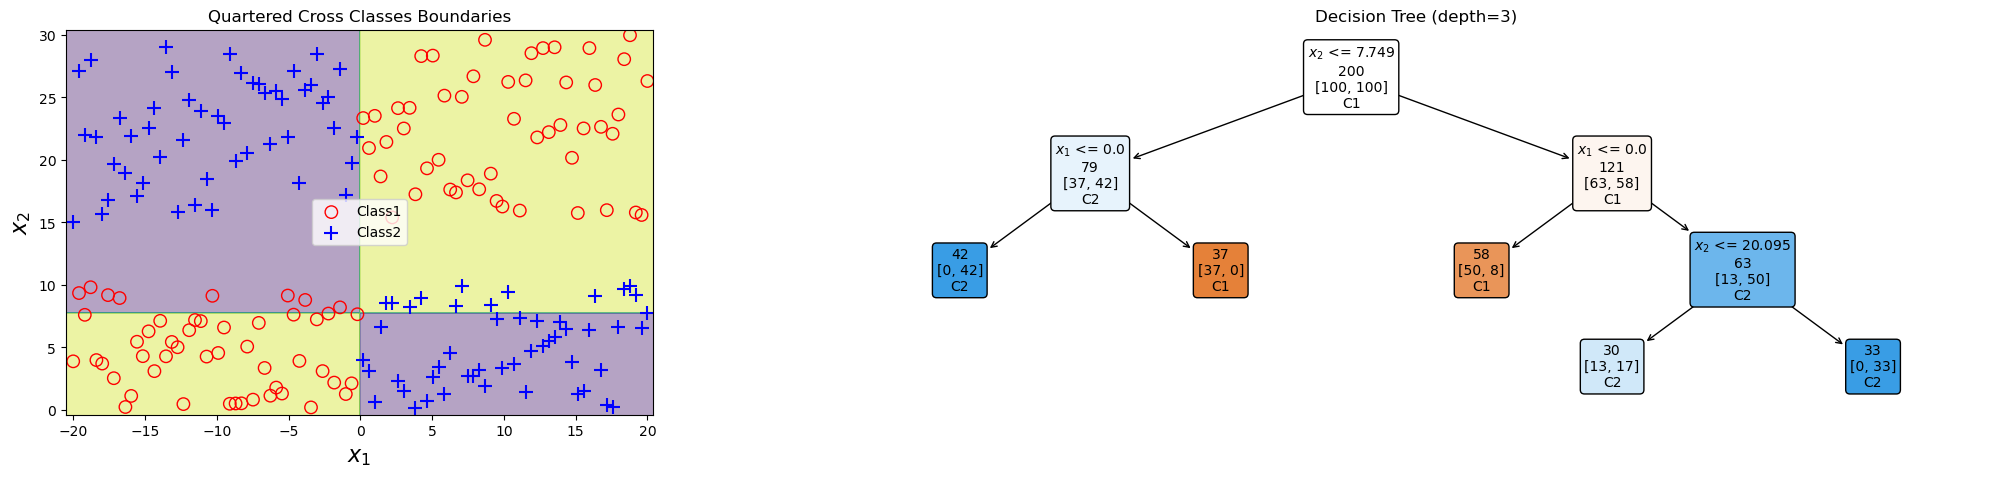

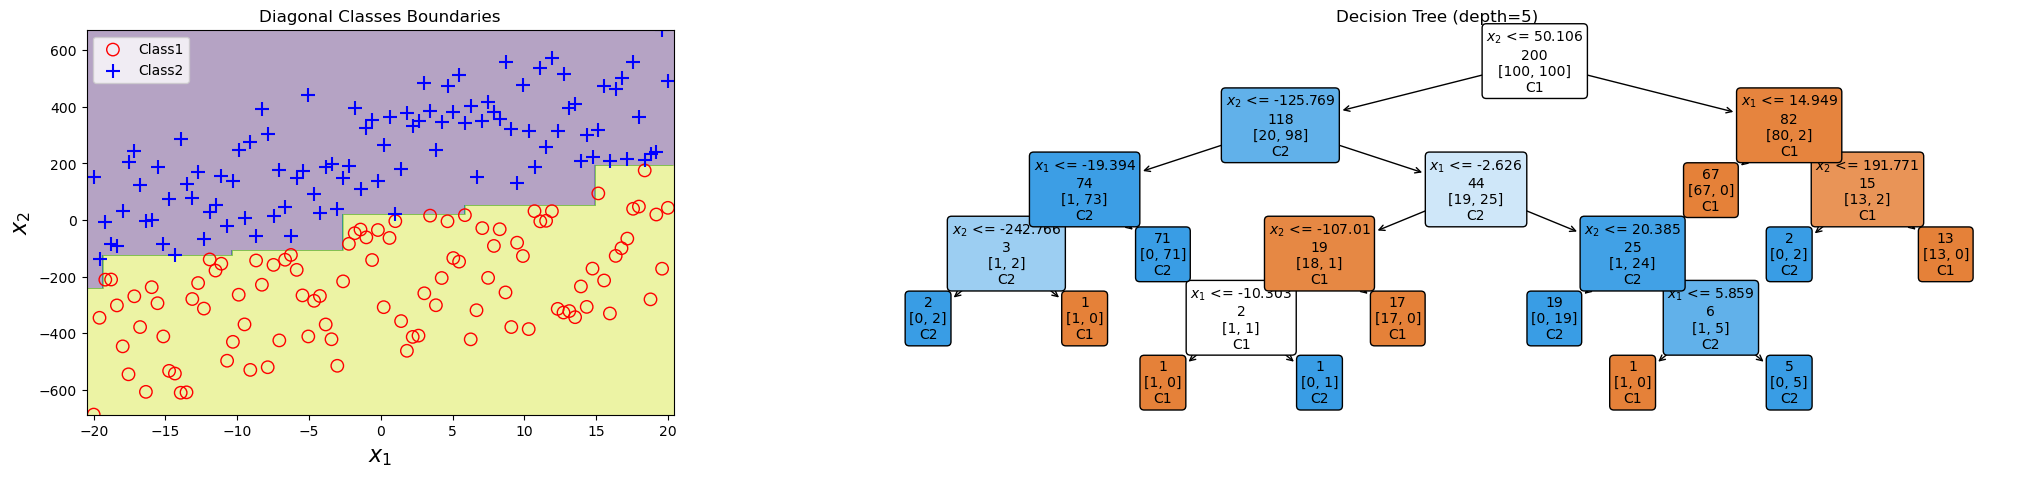

In [4]:
# Initialize a DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Create a list of classifiers, all initially the same
clfs = [clf, clf, clf, clf, clf, clf, clf]

# Titles for each plot that describe the decision boundary condition
titles = [
    'No Margin Horizontal Boundary',
    'Wide Margin Horizontal Boundary',
    'Sandwich Classe1 Boundary',
    'Sandwich Classe1 Boundary Classes-Imbalanced',
    'Sandwich Classe1 Boundary with Class2 Quartered Boundaries',
    'Quartered Cross Classes Boundaries',
    'Diagonal Classes Boundaries'
]

# Get the number of classifiers
k = len(clfs)

# Loop through each classifier to train and plot
for i in range(0, k):
    # Load and convert data from CSV to numpy array
    data = pd.read_csv('DTBoundaryC1C2_' + str(i) + '.csv').to_numpy()
    X, Y = data[:, [0, 1]], data[:, 2]  # Separate features and target

    # Reinitialize the classifier at index i
    clfs[i] = DecisionTreeClassifier()

    # Special configuration for the classifier used in the 6th plot
    if i == 5:
        clfs[5] = DecisionTreeClassifier(max_depth=4, min_samples_leaf=30, min_samples_split=60)

    # Train the classifier
    clfs[i].fit(X, Y)

    # Prepare a subplot for each classifier to show boundary and tree
    _, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(25, 5), gridspec_kw={'width_ratios': [1, 2]})

    # Plot decision boundaries using a helper function
    plotClassBoundary(clfs[i], X[:, 0], X[:, 1], Y, ax=ax[0], title=titles[i], fontsize=10)

    # Plot decision trees using a helper function
    plotTree(clfs[i], ax=ax[1], fontsize=10)

    # Save the plots to the figures directory
    plt.savefig('DTBoundaryC1C2_' + str(i) + '.png')


# Decision Trees Overfitting and its Symptoms
<a id='DTOverfit'></a>

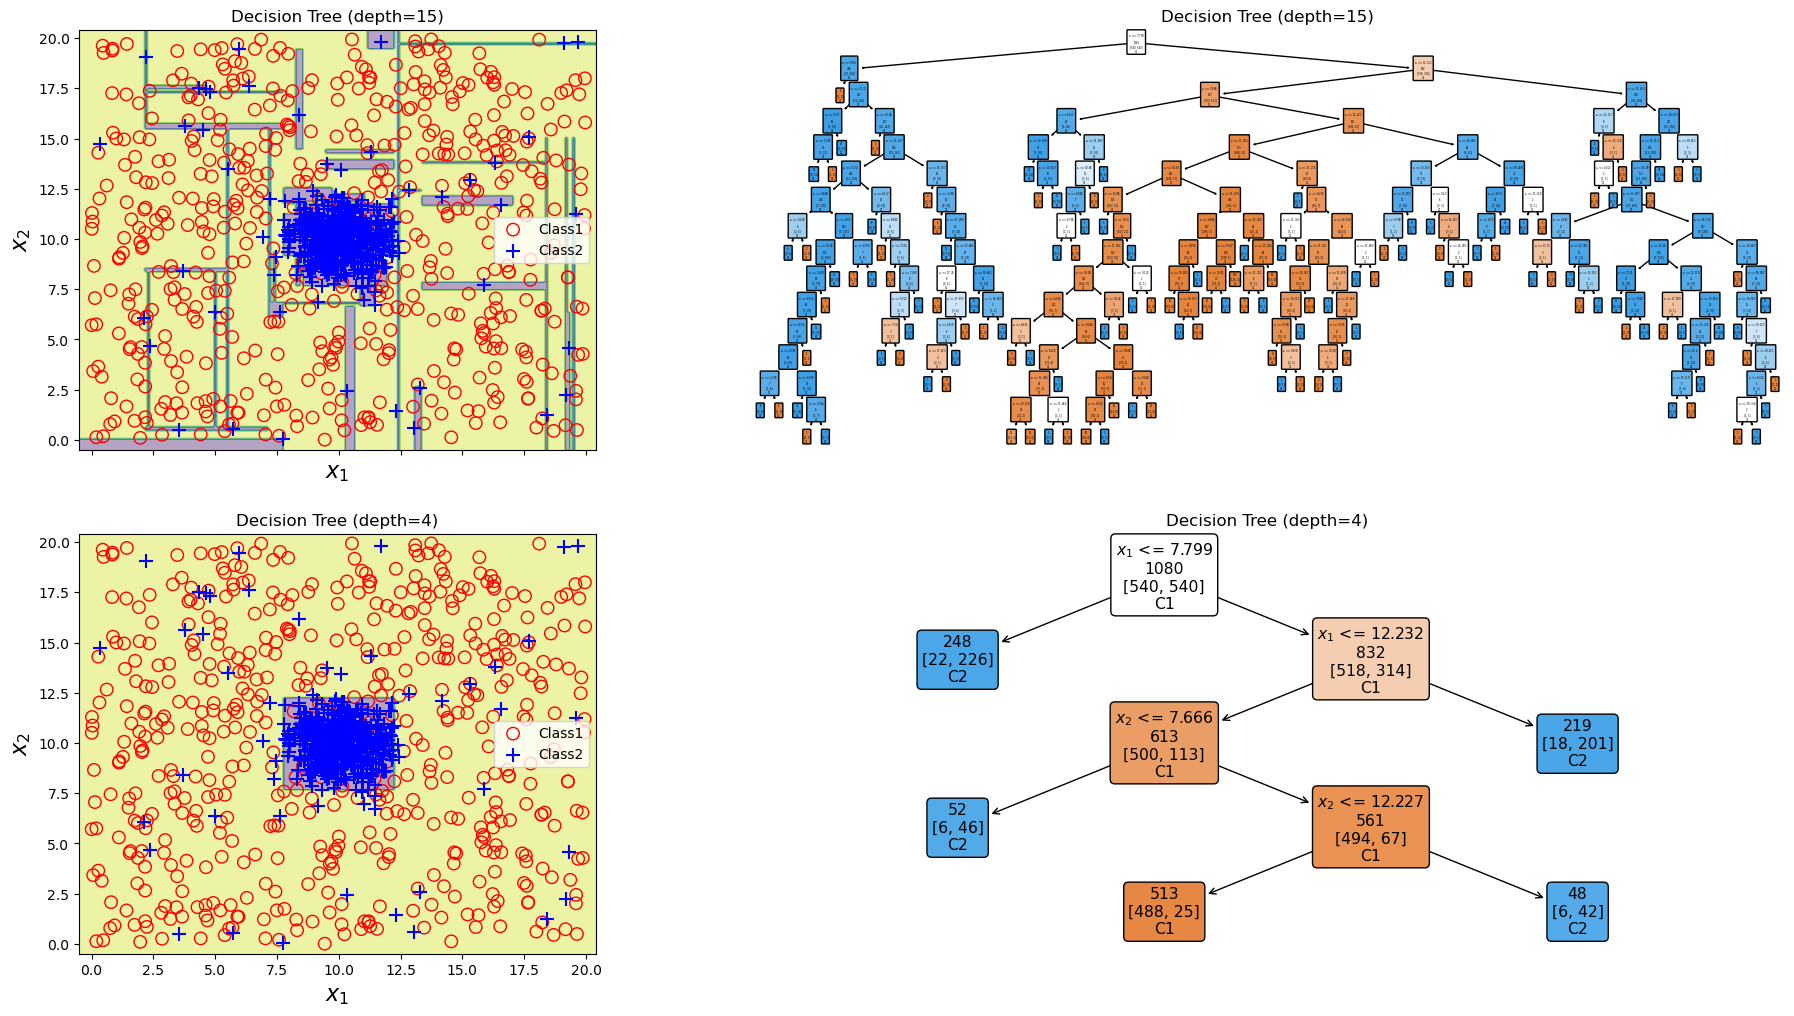

In [5]:
# Load Gaussian example data with a specified percentage of noise
perc = 10  # percentage of noise to be included in the data
data = pd.read_csv('GaussNoiseC1C2_'+str(perc)+'perc.csv').to_numpy()  # load data from CSV
X = data[:, [0,1]]  # extract features from the data
Y = data[:, 2]  # extract labels from the data

# Define two decision tree classifiers with different configurations to illustrate the effects of overfitting
clf1 = DecisionTreeClassifier(max_depth=15)  # deep tree, likely to cause overfitting
clf2 = DecisionTreeClassifier(max_depth=4, min_samples_split=int(255*perc/10), min_samples_leaf=20)  # shallower tree, more regularized

clfs = [clf1, clf2]  # list of classifiers
titles = ['Decision Tree (depth=' + str(clf1.max_depth) + ')', 
          'Decision Tree (depth=' + str(clf2.max_depth) + ')']  # titles for plots, showing tree depth

# Create a 2x2 subplot for plotting class boundaries and decision trees
f, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(22, 12), gridspec_kw={'width_ratios': [1, 2],'height_ratios': [2, 2]})

# Loop through each classifier and plot both the decision boundary and the tree structure
for i in range(2):        
    clfs[i].fit(X, Y)  # train the classifier on the data
    plotClassBoundary(clfs[i], X[:,0], X[:,1], Y, ax=ax[i,0], title=titles[i])  # plot decision boundary in the left subplot
    plotTree(clfs[i], ax=ax[i,1])  # plot the tree structure in the right subplot

# Save the plot to a file in the figures directory
f.savefig('DTOverfitting.png')  # save the figure to the specified file

### Interpretation of Outcomes:
- **Decision Boundary Plots**: These plots will show how each tree divides the feature space. `clf1`, with its deeper structure, may show a very complex boundary, cutting the space finely to fit the data, including noise. This complexity indicates potential overfitting. In contrast, `clf2` will likely show a simpler, more general boundary due to its constraints, which could perform better on unseen data by avoiding overfitting.
- **Tree Structure Plots**: These will reveal the depth and complexity of each tree. `clf1`'s plot might show many levels and branches, indicating detailed but possibly overly specific data fitting. `clf2` will have a shorter, broader tree that emphasizes major patterns in the data with less focus on detailed fitting.

These visualizations help compare the effects of model complexity and regularization in decision trees, especially in the context of handling noisy data.

## Training vs Testing Performance to identify Overfitting

Let us now see how the testing and training errors or accuracies changes when overfitting start to occur. The below is not confined to decision trees, any other classifier or a supervised learning model have a similar behaviour when overfitting occurs

### Training and Test set creation

In [6]:
# Import the train_test_split function from sklearn's model_selection module
# This function is used to split a dataset into a training set and a testing set
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# test_size=0.66 means 66% of the data will be used for testing, leaving 34% for training
# random_state=1 ensures reproducibility of the results by setting a seed for the random number generator
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.66, random_state=1)

# Import the tree module from sklearn, which includes decision tree algorithms
from sklearn import tree

# Import accuracy_score to calculate the accuracy of the model
# Accuracy is the proportion of correct predictions over total predictions
from sklearn.metrics import accuracy_score

# Import f1_score to calculate the F1 score of the model
# F1 score is the harmonic mean of precision and recall, useful for imbalanced datasets
from sklearn.metrics import f1_score

# Import confusion_matrix to calculate the confusion matrix of the model
# A confusion matrix is used to describe the performance of a classification model
from sklearn.metrics import confusion_matrix

### Model Fitting and Evaluation

Below we show Accuracy and Classification error, there are plenty of other metrics as you already ‎know.‎

**Your task** is to try other metrics including F1, Precision and Recall and Compare between them all, visually.

In [7]:
# Create an array of possible values for max_depth from 1 to 30
max_depths = np.arange(1, 31)

# Initialize arrays to store accuracy and error for training and testing datasets
trainAcc, testAcc = np.zeros(len(max_depths)), np.zeros(len(max_depths))
trainErr, testErr = np.zeros(len(max_depths)), np.zeros(len(max_depths))

# Initialize index to keep track of the current depth in the arrays
index = 0

# Iterate over each possible tree depth
for depth in max_depths:
    # Initialize and train a decision tree classifier with the current max_depth
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    
    # Predict labels for the training set
    Y_predTrain = clf.predict(X_train)
    # Predict labels for the test set
    Y_predTest = clf.predict(X_test)
    
    # Calculate and store the accuracy for the training and testing datasets
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    
    # Calculate and store the classification error for the training and testing datasets
    trainErr[index] = 1 - accuracy_score(Y_train, Y_predTrain)
    testErr[index] = 1 - accuracy_score(Y_test, Y_predTest)
    
    # Increment the index to move to the next depth level
    index += 1

### Plot of training and test accuracies


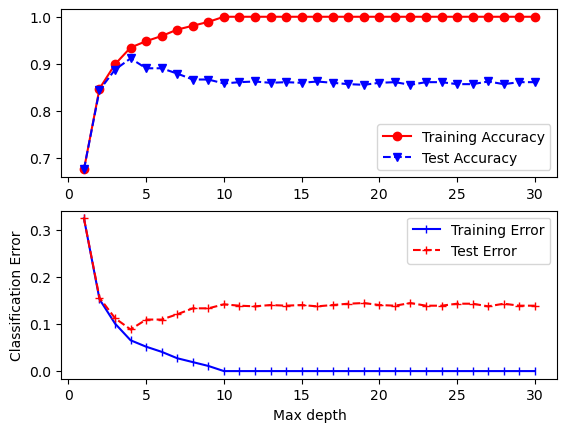

In [8]:
# Create a figure and two subplots (axes), arranged vertically (2 rows, 1 column)
fig, (ax1, ax2) = plt.subplots(2)

# On the first axis (ax1), plot the training accuracy and test accuracy against the max depths
# 'ro-' specifies red color, 'o' marker, and solid line for training accuracy
# 'bv--' specifies blue color, 'v' marker, and dashed line for test accuracy
ax1.plot(max_depths, trainAcc, 'ro-', max_depths, testAcc, 'bv--')

# On the second axis (ax2), plot the training error and test error against the max depths
# 'b|-' specifies blue color, '|' marker, and solid line for training error
# 'r+--' specifies red color, '+' marker, and dashed line for test error
ax2.plot(max_depths, trainErr, 'b|-', max_depths, testErr, 'r+--')

# Add a legend to the first axis, labeling the lines
ax1.legend(['Training Accuracy', 'Test Accuracy'])

# Add a legend to the second axis, labeling the lines
ax2.legend(['Training Error', 'Test Error'])

# Set the x-axis label for the entire figure (common for both subplots)
plt.xlabel('Max depth')

# Set the y-axis label for the entire figure (common for both subplots)
plt.ylabel('Classification Error')

# Display the plot
plt.show()


### Interpreting the Outcomes

- **Training vs. Test Accuracy.** The accuracy plot (on `ax1`) will show how well the decision tree fits the training data and generalizes to unseen test data at various tree depths. If training accuracy is significantly higher than test accuracy, this could indicate overfitting, especially at greater depths.
  
- **Training vs. Test Error.** The error plot (on `ax2`) provides insight into the mistakes made by the model during training and testing. An increasing test error with increasing depth could reinforce indications of overfitting seen in the accuracy plot.

- **General Trends.** Ideally, you would look for a model complexity (tree depth in this case) that balances good performance on training data with the ability to generalize well to new data (high accuracy and low error on both training and test datasets).

### Recommendations for Improvement
The following code provides a clearer and more precise graphical representation of the decision tree's performance metrics, making it easier to interpret the effects of varying the maximum depth of the tree. This is done by doing the following modifications to the code above:

- **Correct Y-axis Label.** It might be better to use two separate y-axis labels for each subplot. For example, the first could be labeled "Accuracy" and the second "Error", instead of the common label "Classification Error".

- **Optimal Depth Determination.** Analyzing these plots can help determine the optimal maximum depth that prevents overfitting while maintaining good model performance. This depth is typically where test accuracy peaks or where test error is minimized before starting to increase due to overfitting.

This approach offers a comprehensive method to visually assess the effects of model complexity on the learning behavior of a decision tree classifier.

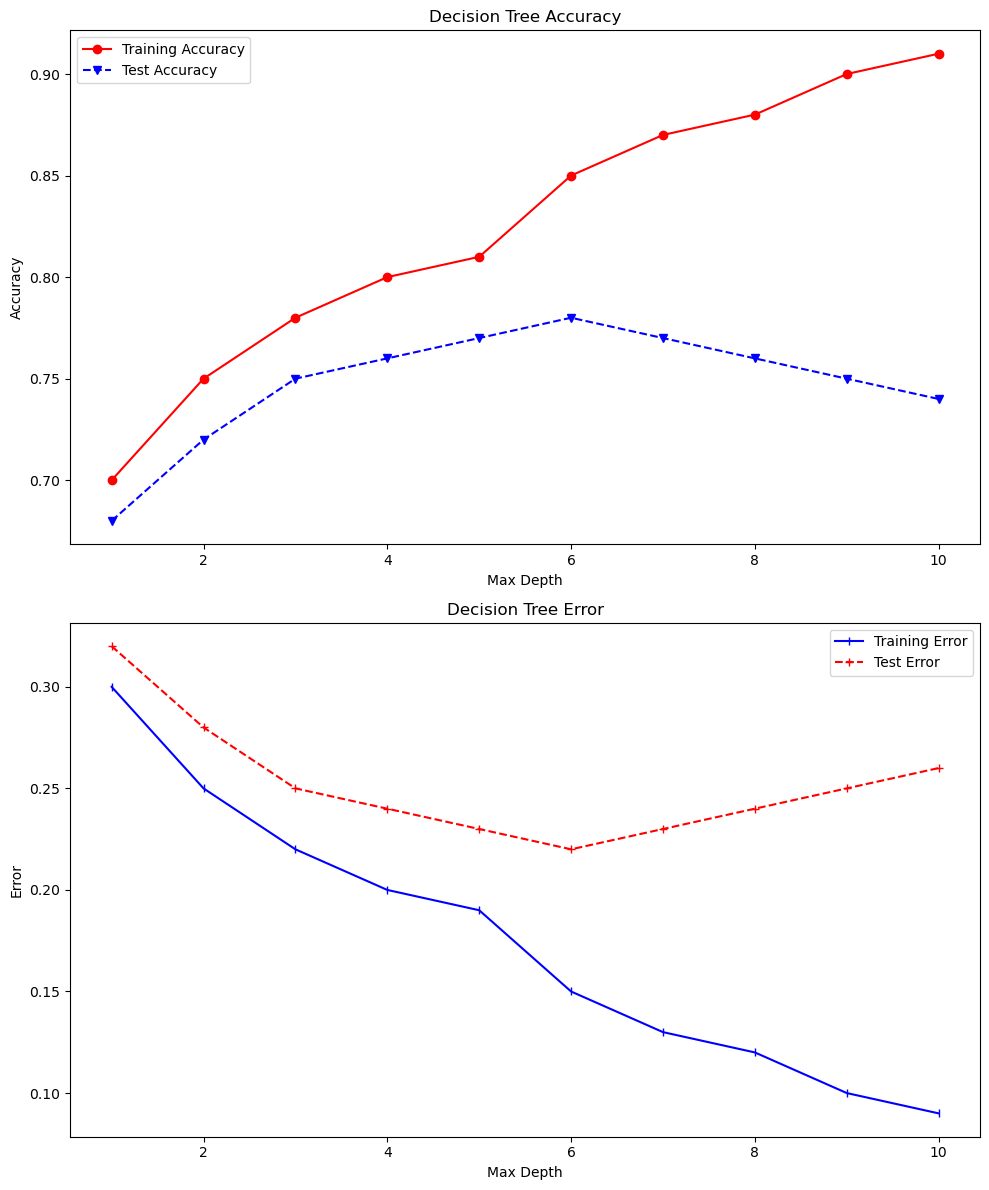

In [9]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Placeholder data - replace with your actual data
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Example max depths
trainAcc = [0.7, 0.75, 0.78, 0.8, 0.81, 0.85, 0.87, 0.88, 0.9, 0.91]  # Example training accuracy
testAcc = [0.68, 0.72, 0.75, 0.76, 0.77, 0.78, 0.77, 0.76, 0.75, 0.74]  # Example test accuracy
trainErr = [0.3, 0.25, 0.22, 0.2, 0.19, 0.15, 0.13, 0.12, 0.1, 0.09]  # Example training error
testErr = [0.32, 0.28, 0.25, 0.24, 0.23, 0.22, 0.23, 0.24, 0.25, 0.26]  # Example test error

# Create a figure and two subplots (axes), arranged vertically (2 rows, 1 column)
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 12))  # Adjusted figure size for better visibility

# On the first axis (ax1), plot the training accuracy and test accuracy against the max depths
ax1.plot(max_depths, trainAcc, 'ro-', max_depths, testAcc, 'bv--')
ax1.set_title('Decision Tree Accuracy')  # Title for the first subplot
ax1.set_xlabel('Max Depth')  # X-axis label
ax1.set_ylabel('Accuracy')  # Y-axis label for accuracy
ax1.legend(['Training Accuracy', 'Test Accuracy'])

# On the second axis (ax2), plot the training error and test error against the max depths
ax2.plot(max_depths, trainErr, 'b|-', max_depths, testErr, 'r+--')
ax2.set_title('Decision Tree Error')  # Title for the second subplot
ax2.set_xlabel('Max Depth')  # X-axis label
ax2.set_ylabel('Error')  # Y-axis label for error
ax2.legend(['Training Error', 'Test Error'])

# Show the plot
plt.tight_layout()  # Adjust layout to not overlap
plt.show()